In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

rent_path = "Raw_Data_VL/Clean_rent.csv"
rent_data = pd.read_csv(rent_path)

per_cap_data = pd.read_excel("/Users/vickylynnmauldin/Desktop/personal-repo/submissions/Project-1/Raw_Data_VL/per_cap_income.xlsx", 
                       sheet_name= "Sheet1", keep_default_na=False, index_col=False)
#per_cap_data = pd.read_csv(per_cap_path)

#rent_data.head()
per_cap_data.head()

<IPython.core.display.Javascript object>

Metropolitan  Per capita personal income1_Dollars_2019  \
0      Atlanta                              50787.285714   
1       Austin                              63871.500000   
2   Sacramento                              57768.750000   

   Per capita personal income1_Dollars_2020  \
0                              53993.857143   
1                              65609.000000   
2                              63128.125000   

   Per capita personal income1_Dollars_2021  
0                              58266.571429  
1                              72319.500000  
2                              67691.875000

In [2]:
#remove ATL from per cap
filter_df = per_cap_data.loc[(per_cap_data["Metropolitan"] == "Sacramento") |
                            (per_cap_data["Metropolitan"] == "Austin"),:]
filter_df

Metropolitan  Per capita personal income1_Dollars_2019  \
1       Austin                                  63871.50   
2   Sacramento                                  57768.75   

   Per capita personal income1_Dollars_2020  \
1                                 65609.000   
2                                 63128.125   

   Per capita personal income1_Dollars_2021  
1                                 72319.500  
2                                 67691.875

In [3]:
#merge dataframes

complete_data_results = pd.merge(filter_df, rent_data, how="left", on="Metropolitan")
# Display the data table for preview

complete_data_results.reset_index(inplace = True)

complete_data_results.drop('Unnamed: 0', axis=1, inplace=True)
complete_data_results.head()


index Metropolitan  Per capita personal income1_Dollars_2019  \
0      0       Austin                                  63871.50   
1      1   Sacramento                                  57768.75   

   Per capita personal income1_Dollars_2020  \
0                                 65609.000   
1                                 63128.125   

   Per capita personal income1_Dollars_2021 State  Avg Rent 2019  \
0                                 72319.500    TX    1453.997604   
1                                 67691.875    CA    1636.942532   

   Avg Rent 2020  Avg Rent 2021  Avg Rent 2022  
0    1454.412674    1636.725076    1858.342581  
1    1721.861460    1901.530077    2055.795276

In [4]:
#list(complete_data_results.columns)

In [5]:
#reorder columns
#current data set shows average rent per month maybe add a new column showing average rent per year based on 
#montly avg and compare per year

In [6]:
#complete_data_results.to_csv("Raw_Data_VL/rent_percap_merge.csv")

In [7]:
# Remove column name 'A'
#complete_data_results.reset_index(inplace = True)

complete_data_results.rename(columns = {'Per capita personal income1_Dollars_2019':'Personal Income 2019', 
                                        'Per capita personal income1_Dollars_2020':'Personal Income 2020',
                                        'Per capita personal income1_Dollars_2021':'Personal Income 2021'}, inplace = True)

complete_data_results.head()

index Metropolitan  Personal Income 2019  Personal Income 2020  \
0      0       Austin              63871.50             65609.000   
1      1   Sacramento              57768.75             63128.125   

   Personal Income 2021 State  Avg Rent 2019  Avg Rent 2020  Avg Rent 2021  \
0             72319.500    TX    1453.997604    1454.412674    1636.725076   
1             67691.875    CA    1636.942532    1721.861460    1901.530077   

   Avg Rent 2022  
0    1858.342581  
1    2055.795276

In [8]:
df_reset = complete_data_results.set_index('State')
df_reset.drop('index', axis=1, inplace=True)
df_reset

Metropolitan  Personal Income 2019  Personal Income 2020  \
State                                                            
TX          Austin              63871.50             65609.000   
CA      Sacramento              57768.75             63128.125   

       Personal Income 2021  Avg Rent 2019  Avg Rent 2020  Avg Rent 2021  \
State                                                                      
TX                72319.500    1453.997604    1454.412674    1636.725076   
CA                67691.875    1636.942532    1721.861460    1901.530077   

       Avg Rent 2022  
State                 
TX       1858.342581  
CA       2055.795276

In [9]:
#https://stephenallwright.com/divide-two-columns-pandas/

#create averge rent per year 
# create a new column
df_reset['avg_year_2019'] = df_reset['Avg Rent 2019']*12
df_reset['avg_year_2020'] = df_reset['Avg Rent 2020']*12
df_reset['avg_year_2021'] = df_reset['Avg Rent 2021']*12
df_reset['avg_year_2022'] = df_reset['Avg Rent 2022']*12

df_reset

Metropolitan  Personal Income 2019  Personal Income 2020  \
State                                                            
TX          Austin              63871.50             65609.000   
CA      Sacramento              57768.75             63128.125   

       Personal Income 2021  Avg Rent 2019  Avg Rent 2020  Avg Rent 2021  \
State                                                                      
TX                72319.500    1453.997604    1454.412674    1636.725076   
CA                67691.875    1636.942532    1721.861460    1901.530077   

       Avg Rent 2022  avg_year_2019  avg_year_2020  avg_year_2021  \
State                                                               
TX       1858.342581   17447.971246   17452.952091   19640.700911   
CA       2055.795276   19643.310383   20662.337516   22818.360922   

       avg_year_2022  
State                 
TX      22300.110975  
CA      24669.543312

In [10]:
#% of income rent takes up
df_reset['%rent_to_inc2019']= df_reset['avg_year_2019']/df_reset['Personal Income 2019']
df_reset['%rent_to_inc2020'] = df_reset['avg_year_2020']/df_reset['Personal Income 2020']
df_reset['%rent_to_inc2021'] = df_reset['avg_year_2021']/df_reset['Personal Income 2021']

df_reset

Metropolitan  Personal Income 2019  Personal Income 2020  \
State                                                            
TX          Austin              63871.50             65609.000   
CA      Sacramento              57768.75             63128.125   

       Personal Income 2021  Avg Rent 2019  Avg Rent 2020  Avg Rent 2021  \
State                                                                      
TX                72319.500    1453.997604    1454.412674    1636.725076   
CA                67691.875    1636.942532    1721.861460    1901.530077   

       Avg Rent 2022  avg_year_2019  avg_year_2020  avg_year_2021  \
State                                                               
TX       1858.342581   17447.971246   17452.952091   19640.700911   
CA       2055.795276   19643.310383   20662.337516   22818.360922   

       avg_year_2022  %rent_to_inc2019  %rent_to_inc2020  %rent_to_inc2021  
State                                                                       
TX      22300.110975          0.273173          0.266015          0.271582  
CA      24669.543312          0.340034          0.327308          0.337092

In [11]:
#income rate of change YoY ((v2-v1)-v1)
#V1 -> V2
#YoY 2019 ->20
df_reset['2019_2020_YRC'] = (df_reset['Personal Income 2020'] - df_reset['Personal Income 2019'])/df_reset['Personal Income 2019']
df_reset['2020_2021_YRC'] = (df_reset['Personal Income 2021'] - df_reset['Personal Income 2020'])/df_reset['Personal Income 2020']


df_reset

Metropolitan  Personal Income 2019  Personal Income 2020  \
State                                                            
TX          Austin              63871.50             65609.000   
CA      Sacramento              57768.75             63128.125   

       Personal Income 2021  Avg Rent 2019  Avg Rent 2020  Avg Rent 2021  \
State                                                                      
TX                72319.500    1453.997604    1454.412674    1636.725076   
CA                67691.875    1636.942532    1721.861460    1901.530077   

       Avg Rent 2022  avg_year_2019  avg_year_2020  avg_year_2021  \
State                                                               
TX       1858.342581   17447.971246   17452.952091   19640.700911   
CA       2055.795276   19643.310383   20662.337516   22818.360922   

       avg_year_2022  %rent_to_inc2019  %rent_to_inc2020  %rent_to_inc2021  \
State                                                                        
TX      22300.110975          0.273173          0.266015          0.271582   
CA      24669.543312          0.340034          0.327308          0.337092   

       2019_2020_YRC  2020_2021_YRC  
State                                
TX          0.027203       0.102280  
CA          0.092773       0.072293

In [12]:
#rent rate of change YoY ((v2-v1)-v1)
#V1 -> V2
#YoY 2019 ->20
df_reset['2019_2020_YRC_Rent'] = (df_reset['Avg Rent 2020'] - df_reset['Avg Rent 2019'])/df_reset['Avg Rent 2019']
df_reset['2020_2021_YRC_Rent'] = (df_reset['Avg Rent 2021'] - df_reset['Avg Rent 2020'])/df_reset['Avg Rent 2020']
df_reset['2020_2022_YRC_Rent'] = (df_reset['Avg Rent 2022'] - df_reset['Avg Rent 2021'])/df_reset['Avg Rent 2021']


df_reset

Metropolitan  Personal Income 2019  Personal Income 2020  \
State                                                            
TX          Austin              63871.50             65609.000   
CA      Sacramento              57768.75             63128.125   

       Personal Income 2021  Avg Rent 2019  Avg Rent 2020  Avg Rent 2021  \
State                                                                      
TX                72319.500    1453.997604    1454.412674    1636.725076   
CA                67691.875    1636.942532    1721.861460    1901.530077   

       Avg Rent 2022  avg_year_2019  avg_year_2020  avg_year_2021  \
State                                                               
TX       1858.342581   17447.971246   17452.952091   19640.700911   
CA       2055.795276   19643.310383   20662.337516   22818.360922   

       avg_year_2022  %rent_to_inc2019  %rent_to_inc2020  %rent_to_inc2021  \
State                                                                        
TX      22300.110975          0.273173          0.266015          0.271582   
CA      24669.543312          0.340034          0.327308          0.337092   

       2019_2020_YRC  2020_2021_YRC  2019_2020_YRC_Rent  2020_2021_YRC_Rent  \
State                                                                         
TX          0.027203       0.102280            0.000285            0.125351   
CA          0.092773       0.072293            0.051877            0.104346   

       2020_2022_YRC_Rent  
State                      
TX               0.135403  
CA               0.081127

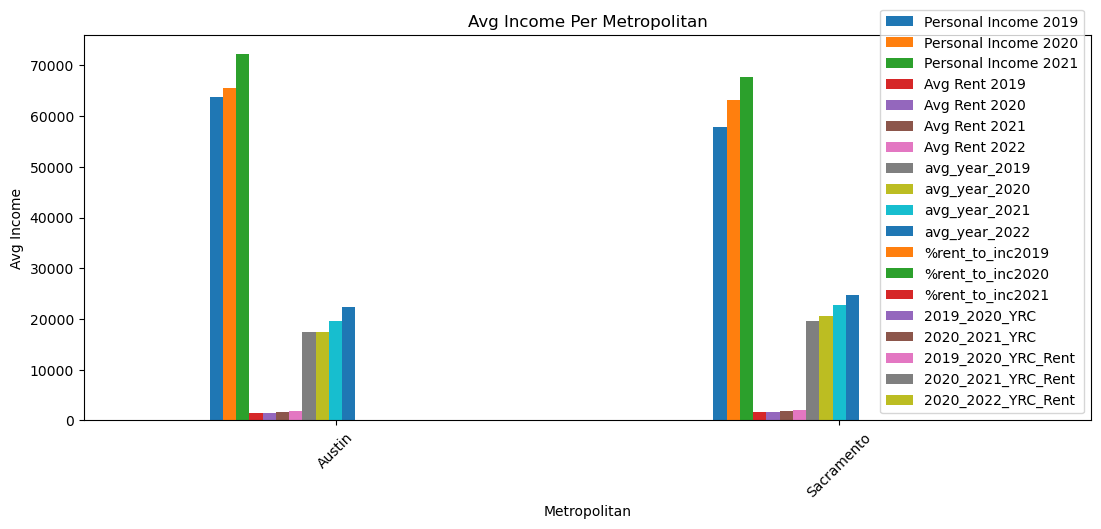

In [13]:

pandas_bar_plot = df_reset.plot(kind="bar",figsize=(13,5))

pandas_bar_plot.set_xticklabels(df_reset["Metropolitan"], rotation=45)

plt.title("Avg Income Per Metropolitan")
plt.xlabel("Metropolitan")
plt.ylabel("Avg Income")
plt.show()

In [15]:
df_reset.columns

Index(['Metropolitan', 'Personal Income 2019', 'Personal Income 2020',
       'Personal Income 2021', 'Avg Rent 2019', 'Avg Rent 2020',
       'Avg Rent 2021', 'Avg Rent 2022', 'avg_year_2019', 'avg_year_2020',
       'avg_year_2021', 'avg_year_2022', '%rent_to_inc2019',
       '%rent_to_inc2020', '%rent_to_inc2021', '2019_2020_YRC',
       '2020_2021_YRC', '2019_2020_YRC_Rent', '2020_2021_YRC_Rent',
       '2020_2022_YRC_Rent'],
      dtype='object')

In [65]:
austin_df = df_reset.loc[df_reset["Metropolitan"] == "Austin", :]
aust_income = austin_df[['Metropolitan', 'Personal Income 2019', 'Personal Income 2020',
       'Personal Income 2021','avg_year_2019', 'avg_year_2020',
       'avg_year_2021']].copy()


#aust_income.reset_index(inplace = True, drop = True)
aust_income.astype({"Personal Income 2019": float, 
                    "Personal Income 2020": float,
                    "Personal Income 2020": float,
                    "avg_year_2019":float,
                    "avg_year_2020":float,
                    "avg_year_2021":float,
                    })
aust_income.dtypes

Metropolitan             object
Personal Income 2019    float64
Personal Income 2020    float64
Personal Income 2021    float64
avg_year_2019           float64
avg_year_2020           float64
avg_year_2021           float64
dtype: object

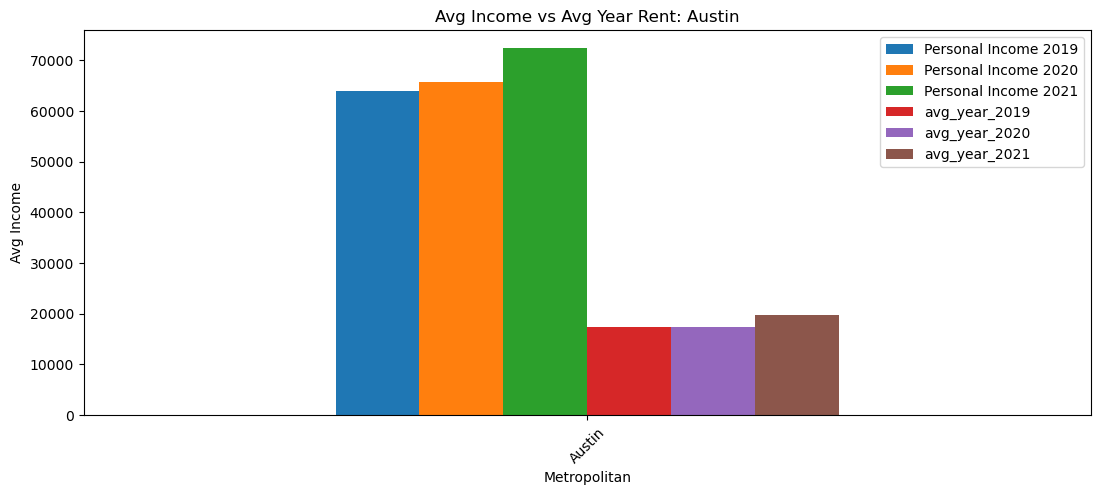

In [91]:
pandas_bar_plot = aust_income.plot(kind="bar",figsize=(13,5))

pandas_bar_plot.set_xticklabels(aust_income["Metropolitan"], rotation=45)

plt.title("Avg Income vs Avg Year Rent: Austin")
plt.xlabel("Metropolitan")
plt.ylabel("Avg Income")
plt.show()



In [94]:
austin_df

Metropolitan  Personal Income 2019  Personal Income 2020  \
State                                                            
TX          Austin               63871.5               65609.0   

       Personal Income 2021  Avg Rent 2019  Avg Rent 2020  Avg Rent 2021  \
State                                                                      
TX                  72319.5    1453.997604    1454.412674    1636.725076   

       Avg Rent 2022  avg_year_2019  avg_year_2020  avg_year_2021  \
State                                                               
TX       1858.342581   17447.971246   17452.952091   19640.700911   

       avg_year_2022  %rent_to_inc2019  %rent_to_inc2020  %rent_to_inc2021  \
State                                                                        
TX      22300.110975          0.273173          0.266015          0.271582   

       2019_2020_YRC  2020_2021_YRC  2019_2020_YRC_Rent  2020_2021_YRC_Rent  \
State                                                                         
TX          0.027203        0.10228            0.000285            0.125351   

       2020_2022_YRC_Rent  
State                      
TX               0.135403

In [ ]:
#df_reset.columns


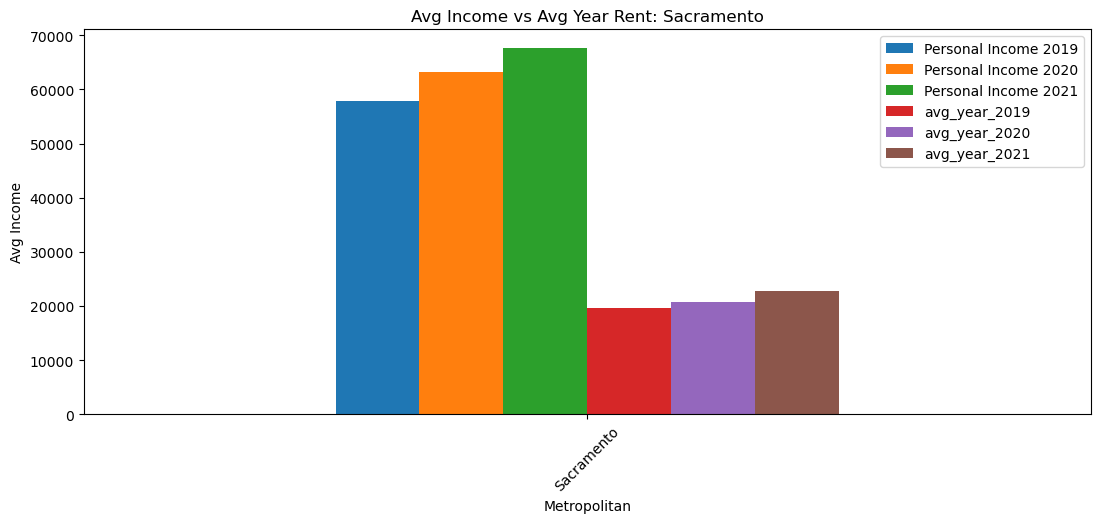

In [101]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
sac_df = df_reset.loc[df_reset["Metropolitan"] == "Sacramento", :]
sac_income = sac_df[['Metropolitan', 'Personal Income 2019', 'Personal Income 2020',
       'Personal Income 2021','avg_year_2019', 'avg_year_2020',
       'avg_year_2021']].copy()


#aust_income.reset_index(inplace = True, drop = True)
sac_income.astype({"Personal Income 2019": float, 
                    "Personal Income 2020": float,
                    "Personal Income 2020": float,
                    "avg_year_2019":float,
                    "avg_year_2020":float,
                    "avg_year_2021":float,
                    })
sac_income.dtypes

pandas_bar_plot = sac_income.plot(kind="bar",figsize=(13,5))

pandas_bar_plot.set_xticklabels(sac_income["Metropolitan"], rotation=45)

plt.title("Avg Income vs Avg Year Rent: Sacramento")
plt.xlabel("Metropolitan")
plt.ylabel("Avg Income")
plt.show()


In [102]:
sac_df

Metropolitan  Personal Income 2019  Personal Income 2020  \
State                                                            
CA      Sacramento              57768.75             63128.125   

       Personal Income 2021  Avg Rent 2019  Avg Rent 2020  Avg Rent 2021  \
State                                                                      
CA                67691.875    1636.942532     1721.86146    1901.530077   

       Avg Rent 2022  avg_year_2019  avg_year_2020  avg_year_2021  \
State                                                               
CA       2055.795276   19643.310383   20662.337516   22818.360922   

       avg_year_2022  %rent_to_inc2019  %rent_to_inc2020  %rent_to_inc2021  \
State                                                                        
CA      24669.543312          0.340034          0.327308          0.337092   

       2019_2020_YRC  2020_2021_YRC  2019_2020_YRC_Rent  2020_2021_YRC_Rent  \
State                                                                         
CA          0.092773       0.072293            0.051877            0.104346   

       2020_2022_YRC_Rent  
State                      
CA               0.081127